# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 604


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =  url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather =  requests.get(city_url).json()


        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yangor
City not found. Skipping...
Processing Record 2 of Set 1 | hami
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | dhankuta
Processing Record 5 of Set 1 | edinburgh of the seven seas
Processing Record 6 of Set 1 | kailua-kona
Processing Record 7 of Set 1 | bichura
Processing Record 8 of Set 1 | strezhevoy
Processing Record 9 of Set 1 | port saint john's
Processing Record 10 of Set 1 | olonkinbyen
Processing Record 11 of Set 1 | waitangi
Processing Record 12 of Set 1 | kisangani
Processing Record 13 of Set 1 | grytviken
Processing Record 14 of Set 1 | maych'ew
Processing Record 15 of Set 1 | saipan
Processing Record 16 of Set 1 | mitu
Processing Record 17 of Set 1 | caluula
Processing Record 18 of Set 1 | isafjordur
Processing Record 19 of Set 1 | el nido
Processing Record 20 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 21 of Set 1 | yellowkn

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          584
Lat           584
Lng           584
Max Temp      584
Humidity      584
Cloudiness    584
Wind Speed    584
Country       584
Date          584
dtype: int64

In [11]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hami,42.8000,93.4500,299.66,21,99,3.26,CN,1715239817
1,port-aux-francais,-49.3500,70.2167,278.63,79,39,10.97,TF,1715239817
2,dhankuta,26.9833,87.3333,300.31,31,71,4.72,NP,1715239817
3,edinburgh of the seven seas,-37.0676,-12.3116,287.29,66,92,13.54,SH,1715239817
4,kailua-kona,19.6406,-155.9956,299.13,94,40,4.63,US,1715239818


In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hami,42.8000,93.4500,299.66,21,99,3.26,CN,1715239817
1,port-aux-francais,-49.3500,70.2167,278.63,79,39,10.97,TF,1715239817
2,dhankuta,26.9833,87.3333,300.31,31,71,4.72,NP,1715239817
3,edinburgh of the seven seas,-37.0676,-12.3116,287.29,66,92,13.54,SH,1715239817
4,kailua-kona,19.6406,-155.9956,299.13,94,40,4.63,US,1715239818


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

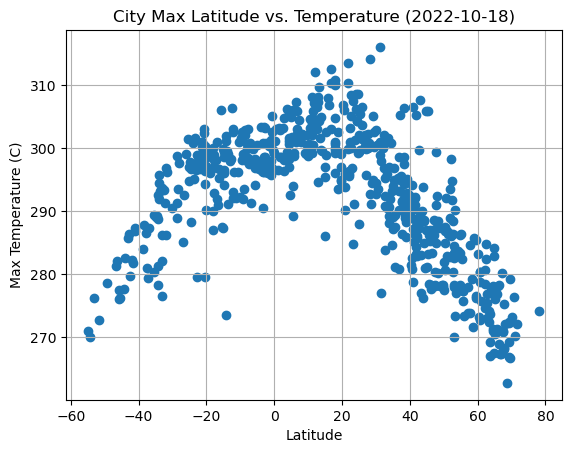

In [17]:
# Build scatter plot for latitude vs. temperature
x_axis_lat = city_data_df["Lat"]
y_axis_temp = city_data_df["Max Temp"]

# Incorporate the other graph properties
plt.scatter(x_axis, y_axis)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

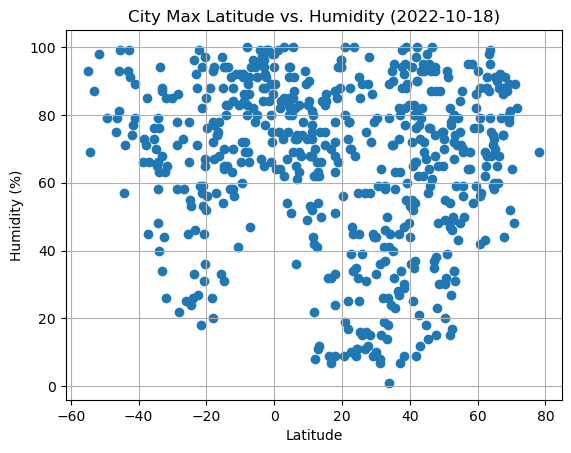

In [18]:
# Build the scatter plots for latitude vs. humidity
x_axis_lat = city_data_df["Lat"]
y_axis_hum = city_data_df["Humidity"]

# Incorporate the other graph properties
plt.scatter(x_axis_lat, y_axis_hum)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Max Latitude vs. Humidity (2022-10-18)")
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

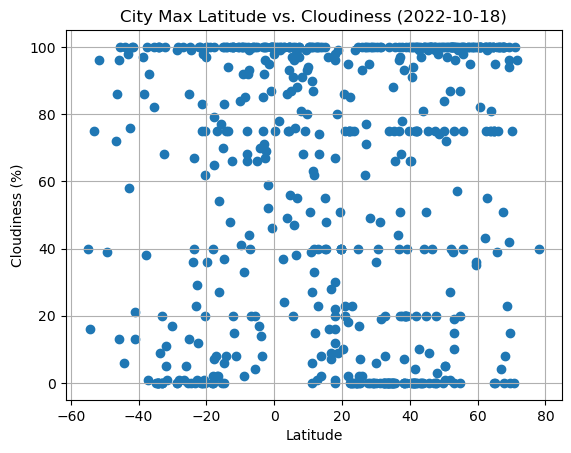

In [20]:
# Build the scatter plots for latitude vs. cloudiness
x_axis_lat = city_data_df["Lat"]
y_axis_cloud = city_data_df["Cloudiness"]

# Incorporate the other graph properties
plt.scatter(x_axis_lat, y_axis_cloud)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Max Latitude vs. Cloudiness (2022-10-18)")
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

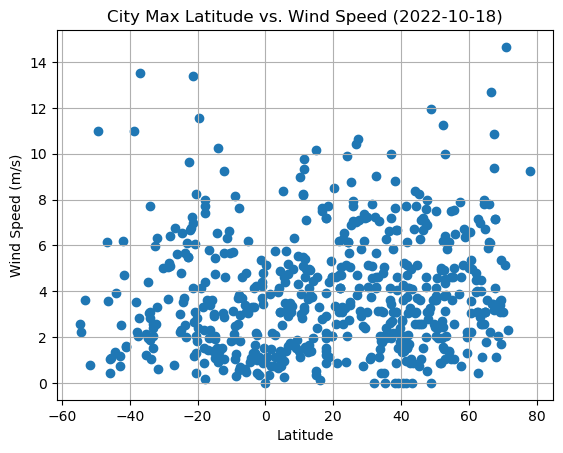

In [21]:
# Build the scatter plots for latitude vs. wind speed
x_axis_lat = city_data_df["Lat"]
y_axis_wind = city_data_df["Wind Speed"]

# Incorporate the other graph properties
plt.scatter(x_axis_lat, y_axis_wind)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Max Latitude vs. Wind Speed (2022-10-18)")
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [191]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x, y):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    regress_line = slope * x + intercept

    # Create regression line
    plt.scatter(x,y)
    plt.plot(x, regress_line, color = "red")
    equation = f'y = {slope:.2f}x + {intercept:.2f}'
    plt.text(x.mean(), y.min(), equation, color = "red",fontsize = 14)
 

In [192]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hami,42.8000,93.4500,299.66,21,99,3.26,CN,1715239817
2,dhankuta,26.9833,87.3333,300.31,31,71,4.72,NP,1715239817
4,kailua-kona,19.6406,-155.9956,299.13,94,40,4.63,US,1715239818
5,bichura,50.5881,107.6022,292.13,32,72,4.58,RU,1715239818
6,strezhevoy,60.7333,77.5889,280.35,88,100,5.36,RU,1715239818


In [193]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port-aux-francais,-49.3500,70.2167,278.63,79,39,10.97,TF,1715239817
3,edinburgh of the seven seas,-37.0676,-12.3116,287.29,66,92,13.54,SH,1715239817
7,port saint john's,-31.6229,29.5448,296.17,65,1,0.59,ZA,1715239818
9,waitangi,-43.9535,-176.5597,282.49,71,100,3.91,NZ,1715239819
11,grytviken,-54.2811,-36.5092,270.06,69,16,2.23,GS,1715239819


###  Temperature vs. Latitude Linear Regression Plot

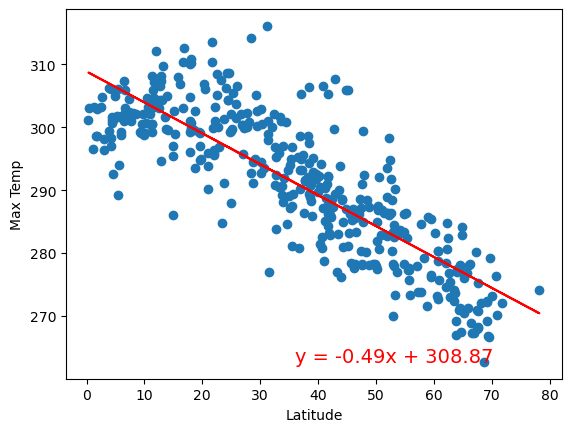

In [194]:
# Linear regression on Northern Hemisphere
x_axis_north_lat = northern_hemi_df["Lat"]
y_axis_north_temp = northern_hemi_df["Max Temp"]

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plot_linear_regression(x_axis_north_lat, y_axis_north_temp)

plt.show()


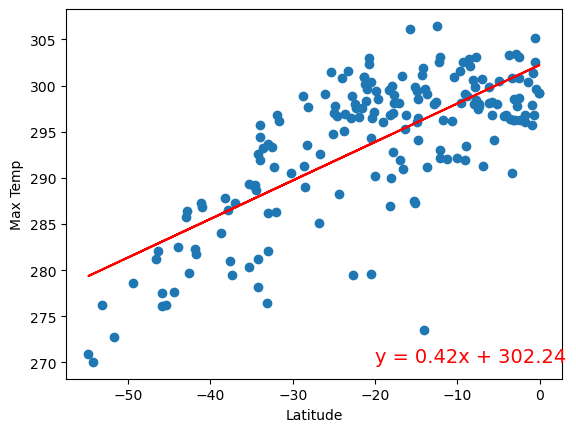

In [195]:
# Linear regression on Southern Hemisphere
x_axis_south_lat = southern_hemi_df["Lat"]
y_axis_south_temp = southern_hemi_df["Max Temp"]

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plot_linear_regression(x_axis_south_lat, y_axis_south_temp)

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [196]:
# Northern Hemisphere
# YOUR CODE HERE

In [197]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [198]:
# Northern Hemisphere
# YOUR CODE HERE

In [199]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [200]:
# Northern Hemisphere
# YOUR CODE HERE

In [201]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE